In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
AccBkk = pd.read_excel('C:/Users/User/Downloads/event2019_BKK.xlsx')

In [5]:
AccBkk

,title,latitude,longitude
0,������������������������������ ���������������...,13.756988,100.565255
1,������������������������������ ���������������...,13.717649,100.565232
2,������������������������������ ���������������...,13.728361,100.515878
3,������������������������������ ���������������...,13.753568,100.580294
4,������������������������������ ���������������...,13.720805,100.557668
...,...,...,...
3061,������������������������������ ���������������...,13.749695,100.548232
3062,������������������������������ ���������������...,13.753643,100.580295
3063,������������������������������ ���������������...,13.753630,100.580293
3064,������������������������������ ���������������...,13.704420,100.516291


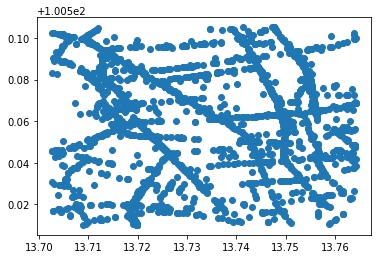

In [86]:
plt.scatter(AccBkk['latitude'], AccBkk['longitude'],cmap='Greys')
plt.show()

In [87]:
from sklearn.cluster import AgglomerativeClustering 
Acc= np.array(AccBkk[['latitude','longitude']].values.tolist())

In [88]:
Acc

array([[ 13.75698822, 100.56525484],
       [ 13.71764933, 100.56523204],
       [ 13.72836112, 100.51587805],
       ...,
       [ 13.7536295 , 100.5802926 ],
       [ 13.70441981, 100.51629111],
       [ 13.74915145, 100.51672965]])

In [89]:
Mod= AgglomerativeClustering (n_clusters=750).fit(Acc)

In [90]:
Mod

AgglomerativeClustering(n_clusters=750)

In [91]:
Ag = Mod.labels_

In [92]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

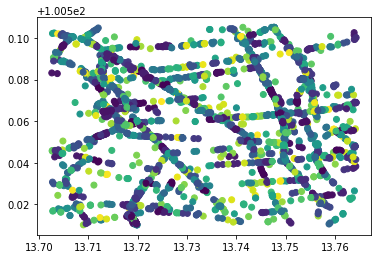

In [93]:
plt.scatter(AccBkk['latitude'], AccBkk['longitude'], c=Ag)
plt.show()

In [94]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [95]:
silhouette_score(Acc,Ag)

0.6026172165550491

In [97]:
import folium

ModuleNotFoundError: No module named 'folium'

In [100]:
import folium as fo

In [107]:
import folium as fo
longitude =  100.5538272857666
latitude = 13.734465925243732
station_map = fo.Map(
                location = [latitude, longitude], 
                zoom_start = 14)
latitudes = list(AccBkk.latitude)
longitudes = list(AccBkk.longitude)
labels = list(AccBkk.title)

for lat, lng, label in zip(latitudes, longitudes, labels):
    fo.Circle(
      location = [lat, lng],
      radius = 1,
      color = 'red' 
     ).add_to(station_map)
station_map